# Clustering

## K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import pandas as pd

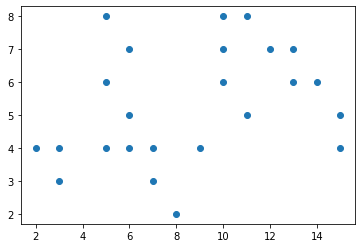

(24, 2)


In [2]:
X = np.array([
    [2, 4],
    [3, 4],
    [3, 3],
    [5, 8],
    [5, 6],
    [5, 4],
    [6, 7],
    [6, 5],
    [6, 4],
    [7, 4],
    [7, 3],
    [8, 2],
    [9, 4],
    [10, 8],
    [10, 7],
    [10, 6],
    [11, 8],
    [11, 5],
    [12, 7],
    [13, 7],
    [13, 6],
    [14, 6],
    [15, 5],
    [15, 4],
])
plt.scatter(X[:,0], X[:,1])
plt.show()
print(X.shape)

In [3]:
k = 2
initial_centers = np.array([[5, 4], [12, 6]])

In [4]:
kmeans = cluster.KMeans(k, init=initial_centers, n_init=1, max_iter=1, verbose=True)
kmeans.fit(X)
print(f"K-means centers:\n{kmeans.cluster_centers_}")

Initialization complete
Iteration 0, inertia 141.0
K-means centers:
[[ 5.25        4.5       ]
 [11.91666667  6.08333333]]


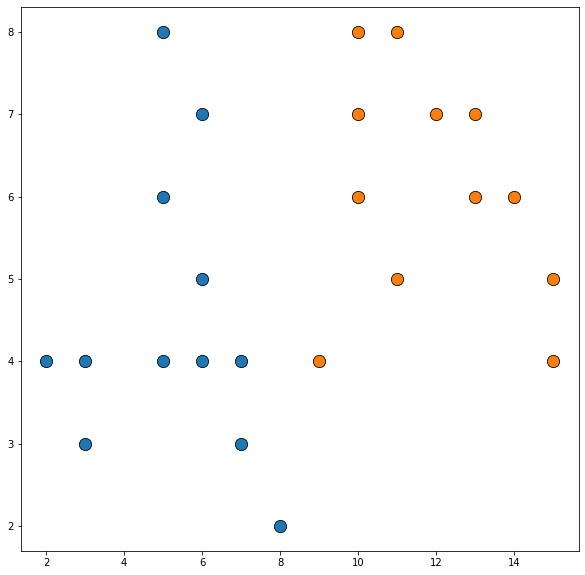

In [5]:
figsize = (10,10)
point_size=150
point_border=0.8
def plot_clustering(X, labels):
    fig = plt.figure(figsize=figsize)
    l0 = X[np.argwhere(labels == 0).flatten()]
    l1 = X[np.argwhere(labels == 1).flatten()]
    plt.scatter(l0[:,0], l0[:,1], s=point_size, zorder=10, edgecolor='black', lw=point_border)
    plt.scatter(l1[:,0], l1[:,1], s=point_size, zorder=10, edgecolor='black', lw=point_border)
    plt.show()
plot_clustering(X, kmeans.labels_)

## DBSCAN

In [6]:
eps = 2
min_samples = 3

### Model

In [7]:
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=3)

### Point Classification

In [8]:
print(f"Core points: ({dbscan.core_sample_indices_.shape[0]} / {X.shape[0]}):\n{X[dbscan.core_sample_indices_]}")
noise_mask = np.ones(X.shape[0], dtype=bool)
noise_mask[dbscan.core_sample_indices_] = False
print(f"Border / Noise points:\n{X[noise_mask]}")
df = pd.DataFrame(X, columns=["x1", "x2"])
df["y_hat"] = dbscan.labels_
print(f'Cluster 0:\n{df[df["y_hat"] == 0]}')
print(f'Cluster 1:\n{df[df["y_hat"] == 1]}')

Core points: (20 / 24):
[[ 2  4]
 [ 3  4]
 [ 3  3]
 [ 5  8]
 [ 5  6]
 [ 5  4]
 [ 6  7]
 [ 6  5]
 [ 6  4]
 [ 7  4]
 [ 7  3]
 [10  8]
 [10  7]
 [10  6]
 [11  8]
 [12  7]
 [13  7]
 [13  6]
 [14  6]
 [15  5]]
Border / Noise points:
[[ 8  2]
 [ 9  4]
 [11  5]
 [15  4]]
Cluster 0:
    x1  x2  y_hat
0    2   4      0
1    3   4      0
2    3   3      0
3    5   8      0
4    5   6      0
5    5   4      0
6    6   7      0
7    6   5      0
8    6   4      0
9    7   4      0
10   7   3      0
11   8   2      0
12   9   4      0
Cluster 1:
    x1  x2  y_hat
13  10   8      1
14  10   7      1
15  10   6      1
16  11   8      1
17  11   5      1
18  12   7      1
19  13   7      1
20  13   6      1
21  14   6      1
22  15   5      1
23  15   4      1


### Plot

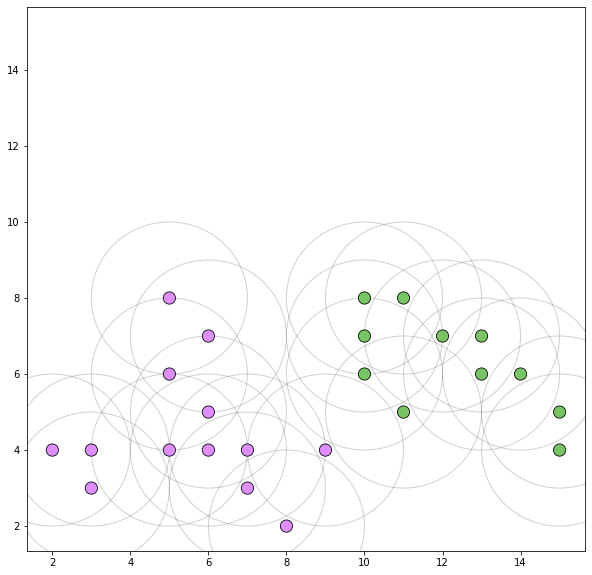

In [9]:
from itertools import cycle, islice
def plot_clustered_dataset(dataset, y_pred, neighborhood=False, epsilon=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=point_size, color=colors[y_pred], zorder=10, edgecolor='black', lw=point_border)
    lims = [ax.get_xlim(), ax.get_ylim()]
    ax.set_xlim(*lims[0])
    ax.set_ylim(*lims[0])
    plt.show()

plot_clustered_dataset(X, dbscan.labels_, neighborhood=True, epsilon=eps)

## Agglomerative Clustering (Hierarchical)

In [10]:
similarity_mat = np.array([
    [1, 0.1, 0.41, 0.55, 0.35],
    [0.1, 1, 0.64, 0.47, 0.98],
    [0.41, 0.64, 1, 0.44, 0.85],
    [0.55, 0.47, 0.44, 1, 0.76],
    [0.35, 0.98, 0.85, 0.76, 1]
])

distance_mat = 1 - similarity_mat
print(distance_mat)

[[0.   0.9  0.59 0.45 0.65]
 [0.9  0.   0.36 0.53 0.02]
 [0.59 0.36 0.   0.56 0.15]
 [0.45 0.53 0.56 0.   0.24]
 [0.65 0.02 0.15 0.24 0.  ]]


In [11]:
# setting distance_threshold=0 ensures we compute the full tree.
agglo = cluster.AgglomerativeClustering(
    affinity="precomputed",
    linkage="complete",
    distance_threshold=0,
    n_clusters=None
)
agglo.fit(distance_mat)
print(agglo.distances_)

[0.02 0.36 0.45 0.9 ]


[[1.   4.   0.02 2.  ]
 [2.   5.   0.36 3.  ]
 [0.   3.   0.45 2.  ]
 [6.   7.   0.9  5.  ]]


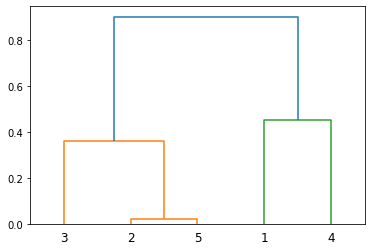

In [12]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    print(linkage_matrix)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agglo, labels=[1, 2, 3, 4, 5])

### Manual Drawing
`single linkage`:
1. Draw from right to left on x-axis (so dist greater from right to left)
2. After two (n) points $p_1$, $p_2$ are merged, next min point to connect has the min dist between either $p_1$ or $p_2$ (any point in cluster)